<a href="https://colab.research.google.com/github/mjgonzalezGUD/TFM_denoising_transformers/blob/main/N2V_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# N2V Training
Here we will train a plain N2V network on single noisy images.

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/project_folder/pn2v-master/unet')
sys.path.append('/content/drive/MyDrive/project_folder/pn2v-master/pn2v')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from model import UNet

import utils
import histNoiseModel
import training

# See if we can use a GPU
device=utils.getDevice()

CUDA available? True


### DATASETS

####Convallaria

In [ ]:

from __future__ import division
from tifffile import imread
from PIL import Image
path='/content/drive/MyDrive/project_folder/pn2v-master/Convallaria_diaphragm/'

# Load the training data
I = Image.open(path+'20190520_tl_25um_50msec_05pc_488_130EM_Conv.tif')
data=imread(path+'20190520_tl_25um_50msec_05pc_488_130EM_Conv.tif')
print (data.shape)


(100, 1024, 1024)


In [ ]:
path='/content/drive/MyDrive/project_folder/pn2v-master/Convallaria_diaphragm/N2V/'
# The N2V network requires only a single output unit per pixel
net = UNet(1, depth=3)


# Split training and validation data.
my_train_data=data[:-5].copy()
my_val_data=data[-5:].copy()

# Start training.

trainHist, valHist = training.trainNetwork(net=net, trainData=my_train_data, valData=my_val_data,
                                          postfix='conv_N2V', directory=path, noiseModel=None,
                                          device=device, numOfEpochs= 200, stepsPerEpoch=50, 
                                          virtualBatchSize=20, batchSize=1, learningRate=1e-3)
                                           

/content/drive/MyDrive/project_folder/pn2v-master/unet/model.py:215: UserWarning: nn.init.xavier_normal is now deprecated in favor of nn.init.xavier_normal_.
  init.xavier_normal(m.weight)
/content/drive/MyDrive/project_folder/pn2v-master/unet/model.py:216: UserWarning: nn.init.constant is now deprecated in favor of nn.init.constant_.
  init.constant(m.bias, 0)


Epoch 0 finished      
avg. loss: 0.18834522254765035+-(2SEM)0.0761739953909173      
Epoch 1 finished      
avg. loss: 0.1785959040746093+-(2SEM)0.046348530408619124      
Epoch 2 finished      
avg. loss: 0.12030059937387705+-(2SEM)0.03330075840620383      
Epoch 3 finished      
avg. loss: 0.11569042596966028+-(2SEM)0.028436250928202775      
Epoch 4 finished      
avg. loss: 0.1559751085937023+-(2SEM)0.04257055183757595      
Epoch 5 finished      
avg. loss: 0.15973636284470558+-(2SEM)0.051126350368377      
Epoch 6 finished      
avg. loss: 0.13379940651357175+-(2SEM)0.03848492433401192      
Epoch 7 finished      
avg. loss: 0.13870176635682582+-(2SEM)0.04535253780916119      
Epoch 8 finished      
avg. loss: 0.1045126872137189+-(2SEM)0.023297275607250555      
Epoch 9 finished      
avg. loss: 0.17208399381488562+-(2SEM)0.04536162075967852      
Epoch 10 finished      
avg. loss: 0.10280792824923993+-(2SEM)0.02930770133057151      
Epoch 11 finished      
avg. loss: 0.09436062

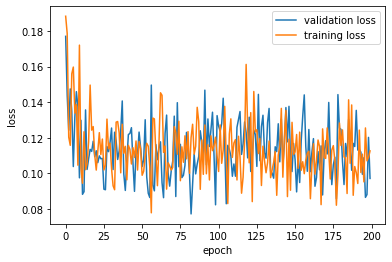

In [ ]:
# Let's look at the training and validation loss
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(valHist, label='validation loss')
plt.plot(trainHist, label='training loss')
plt.legend()
plt.show()

####BSD68

In [ ]:
'''
import zipfile
import urllib

# check if data has been downloaded already
zipPath="/content/drive/MyDrive/project_folder/pn2v-master/data/BSD68_reproducibility.zip"
if not os.path.exists(zipPath):
    #download and unzip data
    data = urllib.request.urlretrieve('https://cloud.mpi-cbg.de/index.php/s/pbj89sV6n6SyM29/download', zipPath)
    with zipfile.ZipFile(zipPath, 'r') as zip_ref:
        zip_ref.extractall("data")
'''

In [ ]:
#X = np.load('/content/drive/MyDrive/project_folder/pn2v-master/data/BSD68_reproducibility_data/train/DCNN400_train_gaussian25.npy')
#X_val = np.load('/content/drive/MyDrive/project_folder/pn2v-master/data/BSD68_reproducibility_data/val/DCNN400_validation_gaussian25.npy')


path = '/content/drive/MyDrive/project_folder/pn2v-master/data/BSD68_reproducibility_data/train/'
path_val = '/content/drive/MyDrive/project_folder/pn2v-master/data/BSD68_reproducibility_data/val/'
# Load the training data
data=np.load(path+'DCNN400_train_gaussian25.npy').astype(np.float32)
data.shape

dataVal=np.load(path_val+'DCNN400_validation_gaussian25.npy').astype(np.float32)
dataVal.shape

(4, 180, 180)

In [ ]:
  # The N2V network requires only a single output unit per pixel
  net = UNet(1, depth=3)


  # Split training and validation data.
  my_train_data=data
  my_val_data=dataVal

  # Start training.

  trainHist, valHist = training.trainNetwork(net=net, trainData=my_train_data, valData=my_val_data,
                                            postfix='conv_N2V', directory=path, noiseModel=None,
                                            device=device, numOfEpochs= 200, stepsPerEpoch=50, 
                                            virtualBatchSize=20, batchSize=1, learningRate=1e-3)
                                           

/content/drive/MyDrive/project_folder/pn2v-master/unet/model.py:215: UserWarning: nn.init.xavier_normal is now deprecated in favor of nn.init.xavier_normal_.
  init.xavier_normal(m.weight)
/content/drive/MyDrive/project_folder/pn2v-master/unet/model.py:216: UserWarning: nn.init.constant is now deprecated in favor of nn.init.constant_.
  init.constant(m.bias, 0)


(3168, 180, 180) (4, 180, 180)


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Epoch 0 finished      
avg. loss: 0.31882372349500654+-(2SEM)0.04491134456512918      
Epoch 1 finished      
avg. loss: 0.27198923379182816+-(2SEM)0.040654352774238595      
Epoch 2 finished      
avg. loss: 0.2586489886045456+-(2SEM)0.03676147604354375      
Epoch 3 finished      
avg. loss: 0.24290381297469138+-(2SEM)0.024863122907659185      
Epoch 4 finished      
avg. loss: 0.21845409348607064+-(2SEM)0.018556319509653085      
Epoch 5 finished      
avg. loss: 0.2083341062068939+-(2SEM)0.013436955278172671      
Epoch 6 finished      
avg. loss: 0.2261187106370926+-(2SEM)0.03315804120229166      
Epoch 7 finished      
avg. loss: 0.21079367250204087+-(2SEM)0.01726559424603022      
Epoch 8 finished      
avg. loss: 0.2146245926618576+-(2SEM)0.01920941399266525      
Epoch 9 finished      
avg. loss: 0.19854237362742425+-(2SEM)0.015172900084164992      
Epoch 10 finished      
avg. loss: 0.20845810025930406+-(2SEM)0.013336250678883952      
Epoch 11 finished      
avg. loss: 0.231

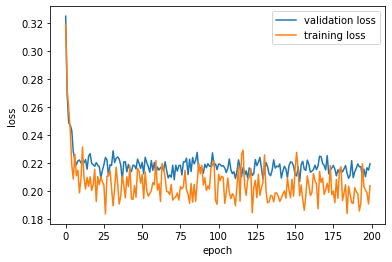

In [ ]:
# Let's look at the training and validation loss
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(valHist, label='validation loss')
plt.plot(trainHist, label='training loss')
plt.legend()
plt.show()